In [1]:
import pandas as pd
import numpy as pd


In [2]:
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.layers import Dense  , Flatten , Conv2D , MaxPooling2D , Dropout

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(Xtrain,ytrain) , (Xtest,ytest) = cifar10.load_data()

Label	Description
0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	truck

In [6]:
Xtrain.shape

(50000, 32, 32, 3)

In [7]:
ytrain.shape

(50000, 1)

In [8]:
import matplotlib.pyplot as plt

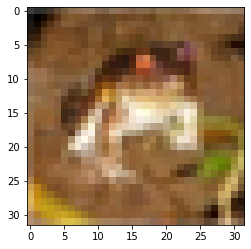

In [9]:
plt.imshow(Xtrain[0])

In [10]:
ytrain[0]

array([6], dtype=uint8)

In [11]:
label = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
label[ytrain[0][0]]

'frog'

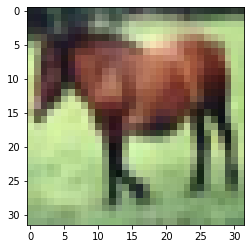

In [13]:
plt.imshow(Xtrain[7])

In [14]:
label[ytrain[7][0]]

'horse'

'truck'

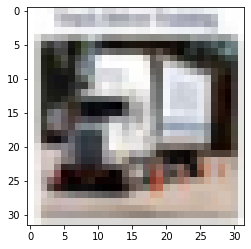

In [15]:
imgno = 666
plt.imshow(Xtrain[imgno])
label[ytrain[imgno][0]]

In [16]:
Xtrain[77].max()

250

In [17]:
Xtrain[77].min()

19

In [18]:
## Scaling
Xtrain_ss = Xtrain/255

In [19]:
## Scaling
Xtest_ss = Xtest/255

In [20]:
Xtrain_ss.max()

1.0

In [21]:
Xtrain_ss.min()

0.0

### Seq. Model

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(32, 32, 3)))
##CNN Layer
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
model.add(Dropout(0.5))
## ANN 
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

2022-05-28 10:44:36.850467: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-28 10:44:36.850981: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [25]:
model.compile(optimizer = 'Adam' , loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
model.fit(Xtrain,ytrain,epochs = 2 , validation_data = (Xtest,ytest))

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 291s 6ms/sample - loss: 2.2238 - accuracy: 0.3573 - val_loss: 1.4143 - val_accuracy: 0.4930
Epoch 2/2
50000/50000 [==============================] - 292s 6ms/sample - loss: 1.3927 - accuracy: 0.5046 - val_loss: 1.2258 - val_accuracy: 0.5628


In [27]:
model.evaluate(Xtest,ytest)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.2257682357788087, 0.5628]

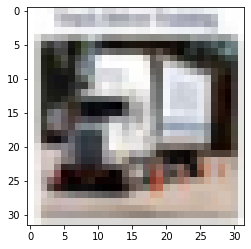

In [59]:
plt.imshow(Xtrain[666])

In [31]:
import cv2

In [68]:
test = cv2.resize(Xtrain[0],(32,32))

In [69]:
test.shape

(32, 32, 3)

In [70]:
import numpy as np

In [71]:
test = np.array(test,dtype = 'float')/255

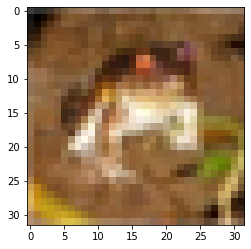

In [72]:
plt.imshow(test)

In [73]:
test = test.reshape(1,32,32,3)

In [77]:
model.predict(test)

array([[0.05573568, 0.04627411, 0.11810198, 0.16453491, 0.14380372,
        0.13572878, 0.15223174, 0.08059193, 0.05716141, 0.04583579]],
      dtype=float32)

In [75]:
label[np.argmax(model.predict(test))]

'cat'